In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# Checking basic stats
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Describing the columns to gain more insights about what their values represent:

Age : Indicates the age of patient

Anemia: 0 =NO , 1=YES ; Anemia is when the body does not have enough red blood cells.

Creatine_phosphokinase(CPK is modified version in my data) : Level of the CPK enzyme in the blood (mcg/L).

Diabetes : 0=NO ,1=YES ; Fasting blood glucose level in healthy individuals is in the range of 70-100 mg / dL. If the level of sugar in the blood exceeds this range, it usually indicates diabetes.

Ejection_fraction: The percentage of blood pumping into the heart. normal is 55% and above.

High_blood_pressure(HBP is modified version in my data) : 0=NO, 1=YES ; Whether the patient has high blood pressure or not.

Platelets: Platelet is the name given to the cells involved in the formation of blood clots. The normal value of thrombocyte in the blood is 150 thousand between 450 thousand in one mm3 of blood.

Serum_creatinine : Level of Creatine produced from the kidneys in the blood.

Serum_sodium : Level of serum creatinine in the blood. The normal range for sodium in the blood is 135-145 mEq / L. A situation with more than 145 millimoles of sodium in a liter of blood means that the body loses more water than it enters the body.

Sex: 0=FEMALE , 1=MALE ; Gender of patient.

Smoking : 0=NOT SMOKING, 1=SMOKING.

Time : Follow up days.

Death_event: Whether patient died during follow up period.

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
#missing value check
df.isna().mean() * 100 

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

So,there is no missing value

# EDA 

In [7]:
df_eda = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [8]:
# importing basic libraries
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

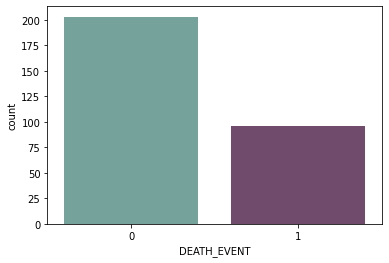

In [9]:
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["DEATH_EVENT"], palette= cols)

**Imbalance dataset**

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
df_eda["sex"] = np.where(df["sex"] < 1, "female", "male")
df_eda["smoking"] = np.where(df["smoking"] < 1, "no", "yes")
df_eda["death_event"] = np.where(df["DEATH_EVENT"] < 1, "no", "yes")

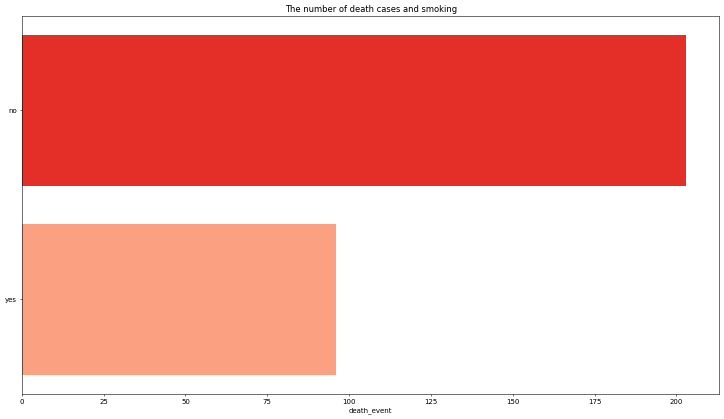

In [12]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(y = df_eda["smoking"].value_counts().index,
            x = df_eda["death_event"].value_counts(),
            data = df_eda, palette = "Reds_r", 
            saturation = 1,
            orient = "h").set(title = "The number of death cases and smoking");

**inconsistency in smoking**

**Outliers**

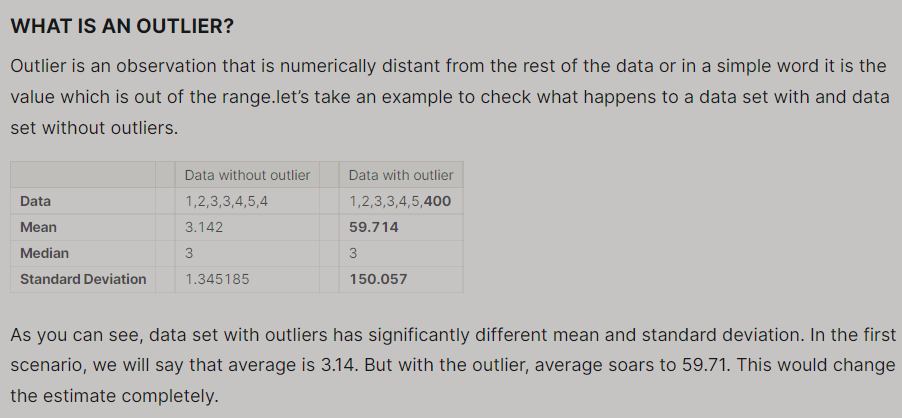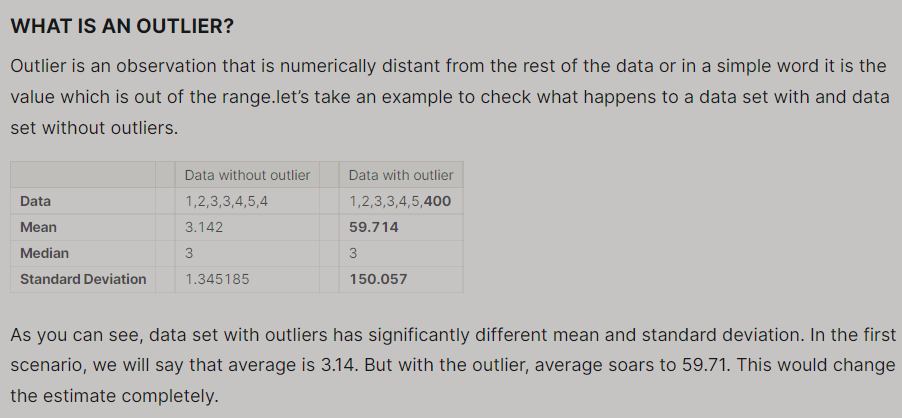

Text(0.5, 1.0, 'Distribution of creatinine_phosphokinase')

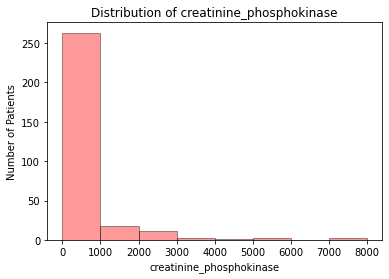

In [13]:
plt.hist(df.creatinine_phosphokinase, color ='red',edgecolor="black",bins=[0,1000,2000,3000,4000,5000,6000,7000,8000],alpha=0.4)
plt.xlabel("creatinine_phosphokinase")
plt.ylabel("Number of Patients")
plt.title("Distribution of creatinine_phosphokinase")

Text(0.5, 1.0, 'Distribution of serum_creatinine')

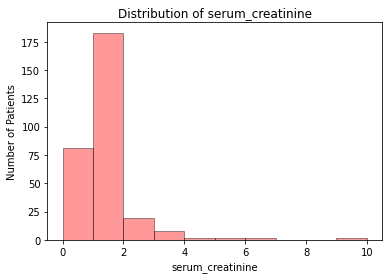

In [14]:

plt.hist(df.serum_creatinine, color ='red',edgecolor="black",bins=[0,1,2,3,4,5,6,7,8,9,10],alpha=0.4)
plt.xlabel("serum_creatinine")
plt.ylabel("Number of Patients")
plt.title("Distribution of serum_creatinine")

<AxesSubplot:title={'center':'Distribution of creatinine_phosphokinase'}, xlabel='creatinine_phosphokinase', ylabel='Count'>

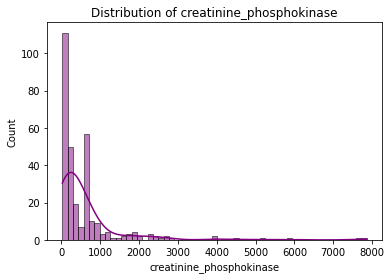

In [15]:
plt.title("Distribution of creatinine_phosphokinase")
sns.histplot(df.creatinine_phosphokinase, kde = True, color ='purple')

<AxesSubplot:title={'center':'Distribution of serum_creatinine'}, xlabel='serum_creatinine', ylabel='Count'>

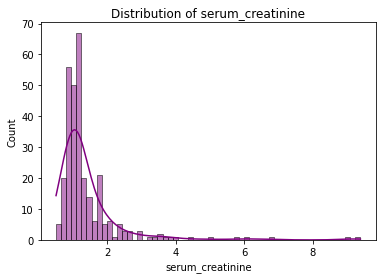

In [16]:
plt.title("Distribution of serum_creatinine")
sns.histplot(df.serum_creatinine, kde = True, color ='purple')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


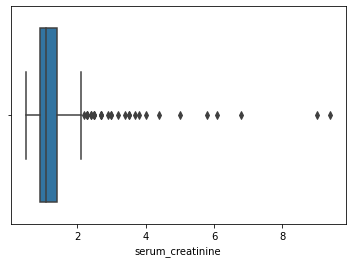

In [17]:
sns.boxplot(df.serum_creatinine,hue = df_eda["death_event"]);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


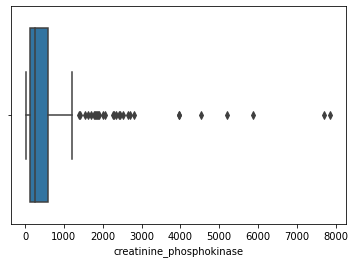

In [18]:
sns.boxplot(df.creatinine_phosphokinase,hue = df_eda["death_event"]);

In [19]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [20]:
df.shape

(299, 13)

In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [22]:
x=df.drop('DEATH_EVENT',axis=1)

In [23]:
x.shape

(299, 12)

In [24]:
x.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [25]:
y=df['DEATH_EVENT']

In [26]:
y.shape

(299,)

In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

3 types of feature selection model
1. univariate selection
2. feature importance
3. correlation of features using heatmap

**univariate selection**
1. chi square : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2
2. f_classif : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
3. mutual_info_classif : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif
4. f_regression : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

In [28]:
from sklearn.feature_selection import SelectKBest, chi2 , f_classif ,mutual_info_classif, f_regression


In [29]:
chi2(x,y)

(array([4.46194546e+01, 7.46593411e-01, 1.89731484e+03, 6.56814450e-04,
        7.90725412e+01, 1.22153853e+00, 2.61357720e+04, 1.98141177e+01,
        1.61817451e+00, 1.95626598e-03, 3.23468288e-02, 3.82689266e+03]),
 array([2.39301981e-11, 3.87556925e-01, 0.00000000e+00, 9.79553740e-01,
        5.98707092e-19, 2.69058926e-01, 0.00000000e+00, 8.53499495e-06,
        2.03346514e-01, 9.64721312e-01, 8.57268569e-01, 0.00000000e+00]))

In [30]:
#by default k=10

In [31]:
selection = SelectKBest(chi2).fit(x,y)
X_new=selection.transform(x)


In [32]:
selection = SelectKBest(f_classif,k=8).fit(x,y)
X_new=selection.transform(x)


In [33]:
selection = SelectKBest(mutual_info_classif).fit(x,y)
X_new=selection.transform(x)


In [34]:
pd.DataFrame(selection.scores_)

,0
0,0.046259
1,0.000000
2,0.012100
3,0.000000
4,0.054637
5,0.000000
6,0.000000
7,0.082429
8,0.012984
9,0.000000


In [35]:
X_new.shape

(299, 10)

# Data Split

In [36]:
from sklearn.model_selection import train_test_split # data dividation

In [37]:
#scikit learn : used for all machine learning algorithm. python build in code

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.15, 
                                                    random_state=101)

In [39]:
X_train.shape,y_train.shape

((254, 12), (254,))

In [40]:
X_test.shape,y_test.shape

((45, 12), (45,))

# MODEL TRY

In [41]:
from sklearn.metrics import classification_report  #classification report mainly used for comparing the value of predicted output and actual output
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score , precision_score

In [42]:
#wait

**Logistic regression**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model1 = LogisticRegression()

**Simple SVM**

In [45]:
from sklearn.svm import SVC

In [46]:
model2 = SVC()

**KNN**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
model3 = KNeighborsClassifier(n_neighbors=6)

**Decision Tree**

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model4 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')

**Random forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model5 = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)

**voting classifier**

In [53]:
from sklearn.ensemble import VotingClassifier

In [54]:
estimator = [] 
estimator.append(('LR', model1))  
estimator.append(('KNN', model3)) 
estimator.append(('DT', model4)) 
estimator.append(('RF', model5)) 

In [55]:
model = VotingClassifier(estimators = estimator, voting ='hard') 


# Output Analysis

In [56]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=6)),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_leaf_nodes=3,
                                                     random_state=0)),
                             ('RF',
                              RandomForestClassifier(max_depth=15,
                                                     max_features=0.5,
                                                     random_state=1))])

In [57]:
predictions = model.predict(X_test)

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.75      0.86        12

    accuracy                           0.93        45
   macro avg       0.96      0.88      0.91        45
weighted avg       0.94      0.93      0.93        45



In [59]:
acc = accuracy_score(y_test, predictions)


In [60]:
acc

0.9333333333333333

In [61]:
recall = recall_score(y_test, predictions)
recall


0.75

In [62]:
precision = precision_score(y_test, predictions)
precision

1.0